# Part II: Clustering

### 1 - Exploratory data analysis and feature selection

##### Importing the dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
confirmed_tab = pd.read_csv('confirmed planets.csv')
confirmed_tab.head()
import warnings
warnings.filterwarnings("ignore")

##### Variables to be dropped from the feature list due to their nature and values

In [2]:
# The following variables cannot be considered as features
not_features = ['rowid', #Index of the dataset
                'pl_hostname', # Stellar name
                'pl_letter', # letter in the planet name
                'pl_name', # Planet name
                'pl_discmethod', # Discovery method
                'pl_pnum', # Number of Planets in System
                'pl_kepflag', # Kepler Field Flag
                'pl_k2flag', # K2 Mission Flag
                'pl_nnotes', # Number of Notes
                'ra_str', # RA (sexagesimal)
                'dec_str', # Dec (sexagesimal)
                'rowupdate', # Date of Last Update
                'pl_facility', # Discovery Facility
                'pl_imgflag', # Planet Imaging Flag
                'pl_tsystemref', #Time System Reference
                'pl_def_reflink', # Default Reference
                'pl_disc', # Year of Discovery
                'pl_disc_reflink', # Discovery Reference
                'pl_locale', # Discovery Locale
                'pl_telescope', # Discovery Telescope
                'pl_instrument', # Discovery Instrument
                'pl_status', # Status
                'pl_st_npar', # Number of Stellar and Planet Parameters
                'pl_st_nref', # Number of Stellar and Planet References
                'pl_pelink', # Link to Exoplanet Encyclopaedia
                'pl_edelink', # Link to Exoplanet Data Explorer
                'pl_publ_date', # Publication Date
                'hd_name', # HD Name
                'hip_name', # HIP Name
                'swasp_id', # SWASP Identifier
                'st_nts', # Number of Time Series
                'st_nplc', # Number of Planet Transit Light Curves
                'st_nglc', # Number of General Light Curves
                'st_nrvc', # Number of Radial Velocity Time Series
                'st_naxa', # Number of Amateur Light Curves
                'st_nimg', # Number of Images
                'st_nspec', # Number of Spectra
                'st_photn', # Number of Photometry Measurements
                'st_colorn;;;;'] # Number of Color Measurements

In [3]:
# Variables with less than 1000 not null values
null_variables = []
for i in confirmed_tab.columns:
    if confirmed_tab[i].notnull().sum() < 1000 :
        null_variables.append(i)

In [4]:
# The following variables have the same value for all data points
unique_value = []
for i in confirmed_tab.columns:
    if confirmed_tab[i].value_counts().count() == 1:
        unique_value.append(i)

In [5]:
# The following variables have aunique value after the filtering stp (X_nn calculation below)
unique_value_af = ['pl_tranflag', 'pl_astflag', 'pl_cbflag']

In [6]:
# The following variables are referring to aquisition of the data
aquisition = ['pl_bmassprov'] #Planetary Fit Type

In [7]:
# Some variables have a more specific information :
# - limit (pl_orbper and pl_orbperlim). These limit are not bringing any useful information and then will be removed
limits = ['pl_orbperlim','pl_orbsmaxlim','pl_orbeccenlim','pl_orbincllim','pl_bmassjlim','pl_bmassjlim','pl_radjlim',
          'pl_denslim','st_distlim','st_optmaglim','gaia_gmaglim','st_tefflim','st_masslim','st_radlim','pl_orbtperlim',
          'pl_orblperlim','pl_rvamplim','pl_eqtlim','pl_insollim','pl_massjlim','pl_msinijlim','pl_masselim','pl_msinielim',
          'pl_bmasselim','pl_radelim','pl_trandeplim','pl_trandurlim','pl_tranmidlim','pl_impparlim',
          'pl_occdeplim','pl_ratdorlim','pl_ratrorlim','st_plxlim','gaia_plxlim','st_pmralim','st_pmdeclim','st_pmlim',
          'gaia_pmralim','gaia_pmdeclim','gaia_pmlim','st_radvlim','st_logglim','st_lumlim','st_denslim',
          'st_metfelim','st_agelim','st_vsinilim','st_actslim','st_actrlim','st_actlxlim','st_ujlim','st_vjlim','st_bjlim',
          'st_rclim','st_iclim','st_jlim','st_hlim','st_klim','st_wise1lim','st_wise2lim','st_wise3lim','st_wise4lim',
          'st_irac1lim','st_irac2lim','st_irac3lim','st_irac4lim','st_mips1lim','st_mips2lim','st_mips3lim','st_iras1lim',
          'st_iras2lim','st_iras3lim','st_iras4lim','st_umbjlim','st_bmvjlim','st_vjmiclim','st_vjmrclim','st_jmh2lim',
          'st_hmk2lim','st_jmk2lim','st_bmylim','st_m1lim','st_c1lim','pl_radslim']

# - Uncertainties (pl_orbper and pl_orbpererr1/pl_orbpererr2). These uncetainties might bring overlapping between clusters
Uncertainties = ['pl_orbpererr1','pl_orbpererr2','pl_orbsmaxerr1','pl_orbsmaxerr2','pl_orbeccenerr1','pl_orbeccenerr2',
                 'pl_orbinclerr1','pl_orbinclerr2','pl_bmassjerr1','pl_bmassjerr2','pl_radjerr1','pl_radjerr2','pl_denserr1',
                 'pl_denserr2','st_disterr1','st_disterr2','st_optmagerr','gaia_gmagerr','st_tefferr1','st_tefferr2',
                 'st_masserr1','st_masserr2','st_raderr1','st_raderr2','pl_angseperr1','pl_angseperr2','pl_orbtpererr1',
                 'pl_orbtpererr2','pl_orblpererr1','pl_orblpererr2','pl_rvamperr1','pl_rvamperr2','pl_eqterr1','pl_eqterr2',
                 'pl_insolerr1','pl_insolerr2','pl_massjerr1','pl_massjerr2','pl_msinijerr1','pl_msinijerr2','pl_masseerr1',
                 'pl_masseerr2','pl_msinieerr1','pl_msinieerr2','pl_bmasseerr1','pl_bmasseerr2','pl_radeerr1','pl_radeerr2',
                 'pl_radserr1','pl_radserr2','pl_trandeperr1','pl_trandeperr2','pl_trandurerr1','pl_trandurerr2',
                 'pl_tranmiderr1','pl_tranmiderr2','pl_impparerr1','pl_impparerr2','pl_occdeperr1','pl_occdeperr2',
                 'pl_ratdorerr1','pl_ratdorerr2','pl_ratrorerr1','pl_ratrorerr2','st_plxerr1','st_plxerr2','gaia_plxerr1',
                 'gaia_plxerr2','gaia_disterr1','gaia_disterr2','st_pmraerr','st_pmdecerr','st_pmerr','gaia_pmraerr',
                 'gaia_pmdecerr','gaia_pmerr','st_radverr1','st_radverr2','st_loggerr1','st_loggerr2','st_lumerr1','st_lumerr2',
                 'st_denserr1','st_denserr2','st_metfeerr1','st_metfeerr2','st_ageerr1','st_ageerr2','st_vsinierr1',
                 'st_vsinierr2','st_actserr','st_actrerr','st_actlxerr','st_ujerr','st_vjerr','st_bjerr','st_rcerr','st_icerr',
                 'st_jerr','st_herr','st_kerr','st_wise1err','st_wise2err','st_wise3err','st_wise4err','st_irac1err',
                 'st_irac2err','st_irac3err','st_irac4err','st_mips1err','st_mips2err','st_mips3err','st_iras1err',
                 'st_iras2err','st_iras3err','st_iras4err','st_umbjerr','st_bmvjerr','st_vjmicerr','st_vjmrcerr','st_jmh2err',
                 'st_hmk2err','st_jmk2err','st_bmyerr','st_m1err','st_c1err']

In [8]:
# The following variables are repeating informations from other variables
repetition = ['pl_masse','pl_masseerr1','pl_masseerr2','pl_msinie','pl_msinieerr1','pl_msinieerr2', # in pl_bmasse
              'pl_massj','pl_massjerr1','pl_massjerr2','pl_msinij','pl_msinijerr1','pl_msinijerr2', # in pl_bmassj
              'pl_bmassj','pl_bmassjerr1','pl_bmassjerr2', # proportional to pl_bmasse
              'pl_radj','pl_radjerr1','pl_radjerr2','pl_rads','pl_radserr1','pl_radserr2', # proportional to pl_rade
              'st_vj', 'st_vjerr', # in st_optmag
              'st_rah'] # in ra

To establish the repetition list above, I used the following correlation matrix and went through. One limitation I faced is the understanding of the physical meaning of the variables highly correlated to determine if they're really giving the same information

corr_df = X_all.corr()

for i in corr_df.index:

    for j in corr_df.columns:
    
        if i==j:
        
            corr_df[i][j] =None
            
corr_new = corr_df.stack().sort_values(ascending=False)

corr_new

In [9]:
# The following variables
categorical = ['st_spstr', # Spectral Type
               'st_metratio', # Metallicity Ratio
               'st_optband'] # Optical Magnitude Band

##### Check of some high values

In [10]:
# We define here a first list of variables to be dropped based on the previous step of exploratory data analysis
to_drop=not_features+null_variables+unique_value+unique_value_af+aquisition+limits+Uncertainties+repetition+categorical
box = confirmed_tab.drop(to_drop,axis=1)
box.shape

(3890, 52)

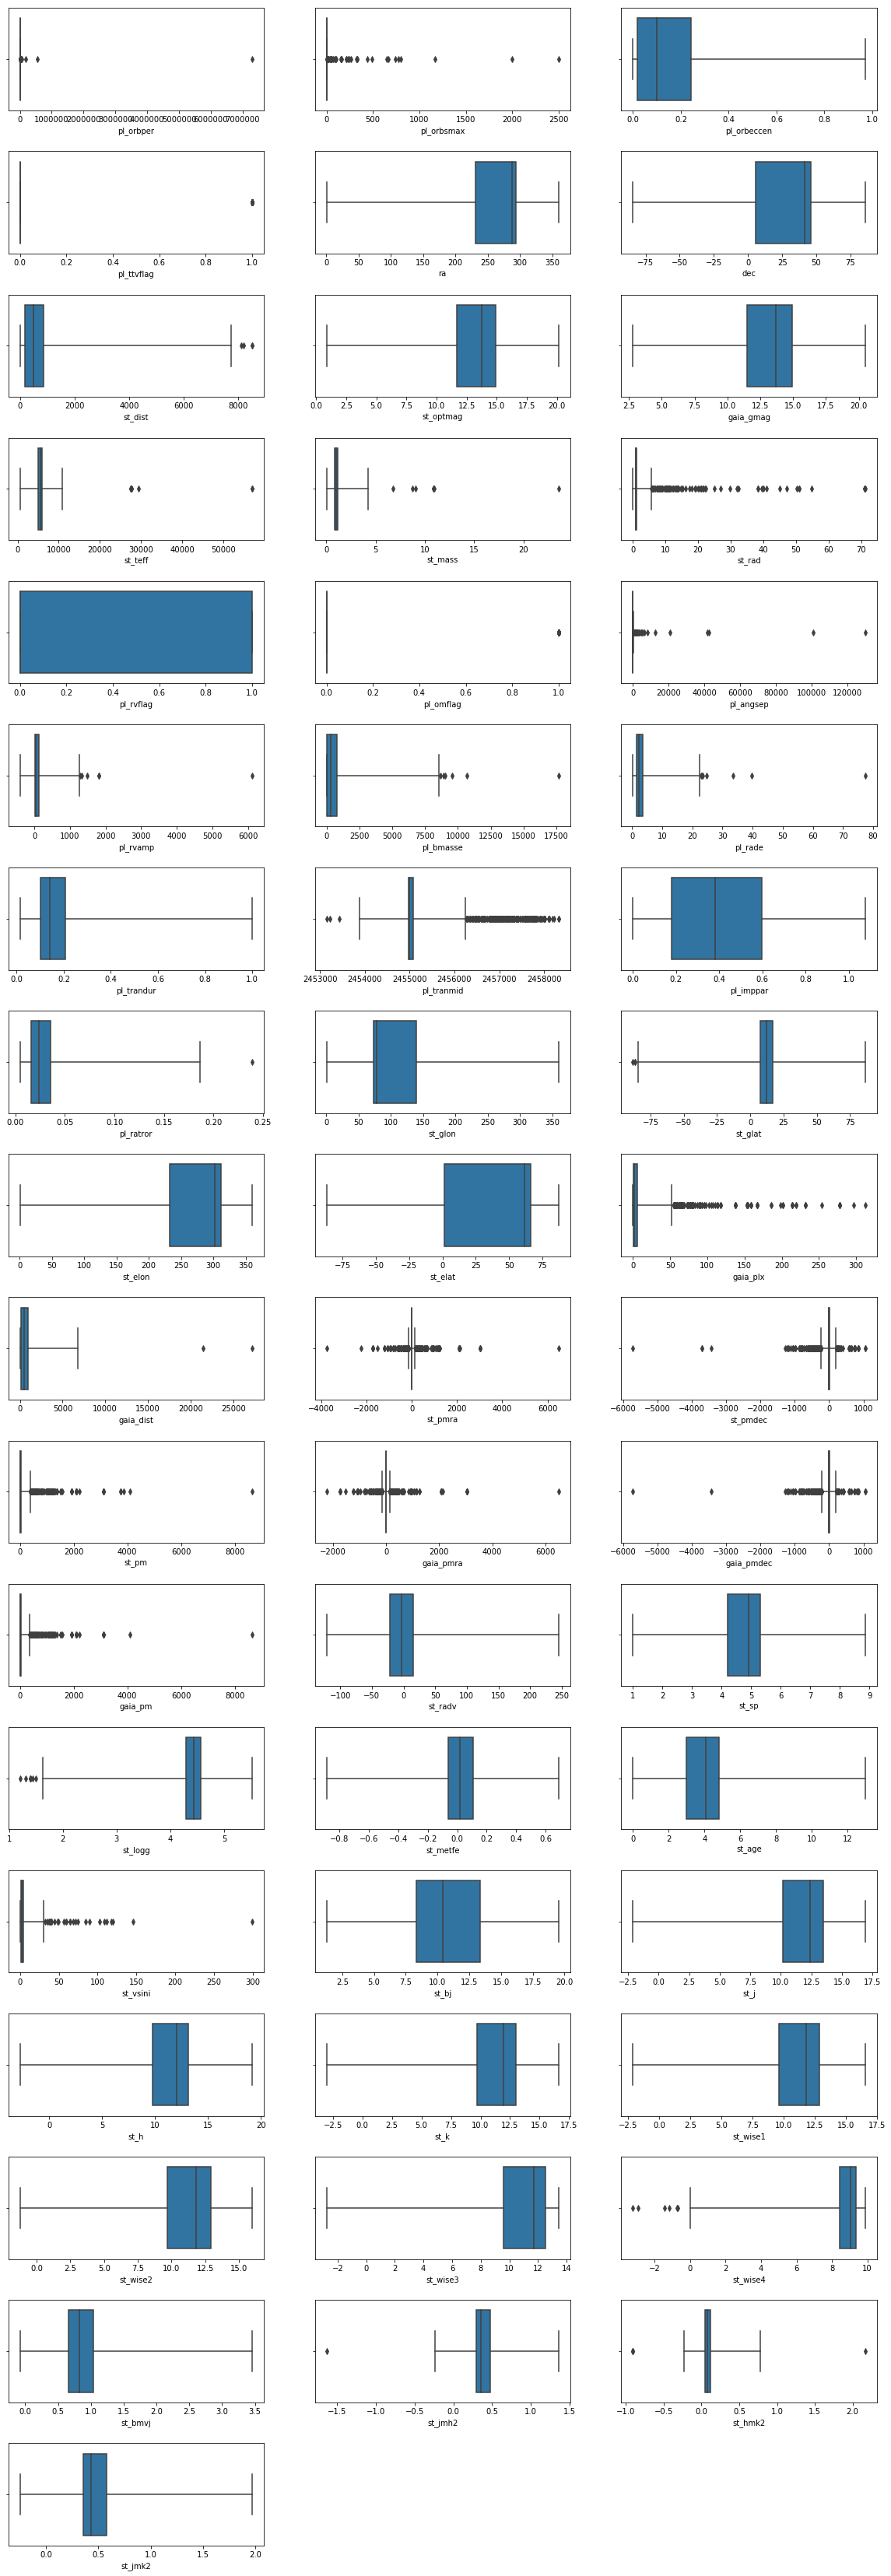

In [11]:
f = plt.figure(figsize=(20, 60))
i=1
import math
for col in box.columns:
    subplot = f.add_subplot(math.ceil(box.shape[1]/3),3,i)
    sns.boxplot(x=box[col].dropna(),whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4)
plt.show()

The high orbital period. In fact, wehen verifying on the internet, there is an extra 0 on the right side of these values for this planet. By the way, even after correcting them, they stay quite high (730000 days = 2000 years)

In [12]:
confirmed_tab.loc[np.argmax(box.pl_orbper),['pl_name','pl_orbper','pl_orbpererr1','pl_orbpererr2']]

pl_name          Oph 11 b
pl_orbper         7.3e+06
pl_orbpererr1    3.65e+06
pl_orbpererr2   -3.65e+06
Name: 3634, dtype: object

In [13]:
confirmed_tab.pl_orbper[np.argmax(box.pl_orbper)] = 730000
confirmed_tab.pl_orbpererr1[np.argmax(box.pl_orbper)] = 365000
confirmed_tab.pl_orbpererr2[np.argmax(box.pl_orbper)] = -365000

Verified from internet, pl_orbsmax of this planet is correct

In [14]:
confirmed_tab.loc[np.argmax(box.pl_orbsmax),['pl_name','pl_orbsmax']]

pl_name       WD 0806-661 b
pl_orbsmax             2500
Name: 3837, dtype: object

Verified from internet, the Effective Temperature (st_teff) of the host star is correct

In [15]:
confirmed_tab.loc[np.argmax(box.st_teff),['pl_hostname','st_teff']]

pl_hostname    NN Ser
st_teff         57000
Name: 3580, dtype: object

Verified on internet, the value of pl_bmasse of this planet is incorrect, right value 6808.

In [16]:
confirmed_tab.loc[np.argmax(box.pl_bmasse),['pl_name','pl_bmasse']]

pl_name      BD+20 2457 b
pl_bmasse         17668.2
Name: 45, dtype: object

In [17]:
confirmed_tab.pl_bmasse[np.argmax(box.pl_bmasse)] = 6808

##### Missing values

Following the same reasoning than the first part, we will simply remove data points that have at least one empty value

In [18]:
# Variables to drop from the features list
X_all = confirmed_tab.drop(to_drop,axis=1)
X_nn = X_all[X_all.isnull().sum(axis=1)==0]

# comparing input shapes
print('Input shape before filtering datapoints is ',X_all.shape)
print('Input shape after removing all data points with at least one empty value is ',X_nn.shape)

Input shape before filtering datapoints is  (3890, 52)
Input shape after removing all data points with at least one empty value is  (24, 52)


Doing this, we end up having almost not any data point.

The second option would be to replace the empty values by the mean value for each feature.

Let's take an example here:

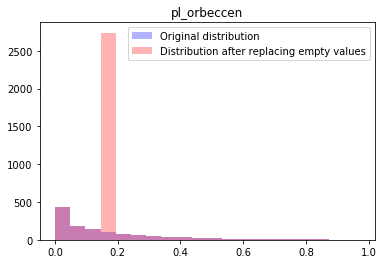

In [19]:
plt.hist(X_all.pl_orbeccen[X_all.pl_orbeccen.notnull()],histtype='stepfilled', alpha=0.3, bins=20,color='b',
         label='Original distribution')
plt.hist(X_all.pl_orbeccen.fillna(value=X_all.pl_orbeccen.mean()),histtype='stepfilled', alpha=0.3, bins=20,color='r',
         label='Distribution after replacing empty values')
plt.title('pl_orbeccen')
plt.legend()
plt.show()

This is not a good idea eather as it's completely changing the distribution and thus will bias the clasification.

One other option would be to have a subset of these features while keeping a minimum of data points when removing those with at least 1 empty value.

In [20]:
# List of variables with at least 1 missing value
list_null_values = pd.DataFrame({'Variable':[],'nb_empty':[]})
for i in confirmed_tab.drop(to_drop,axis=1).columns:
    if confirmed_tab[i].isnull().sum() > 0:
        list_null_values=pd.concat([list_null_values,pd.DataFrame({'Variable':[i],
                                                                   'nb_empty':[confirmed_tab[i].isnull().sum()]})])
list_null_values.sort_values('nb_empty',ascending=True,inplace=True)
list_null_values.reset_index(inplace=True, drop=True)

print('There is {} variables with at least 1 missing value'.format(list_null_values.shape[0]))

There is 43 variables with at least 1 missing value


Lets have a look what's the impact of each of these variables on how many data points remains when we apply the filtering rule (remove data points with at least one missing value)

In [21]:
# We calculate here the number of remaining data points each time we add a feature to the list
aggr_count = []
for i in range(list_null_values.shape[0]):
    X_part = X_all.drop(list_null_values.Variable[i+1:],axis=1)
    X_nn = X_part[X_part.isnull().sum(axis=1)==0]
    aggr_count.append(X_nn.shape[0])

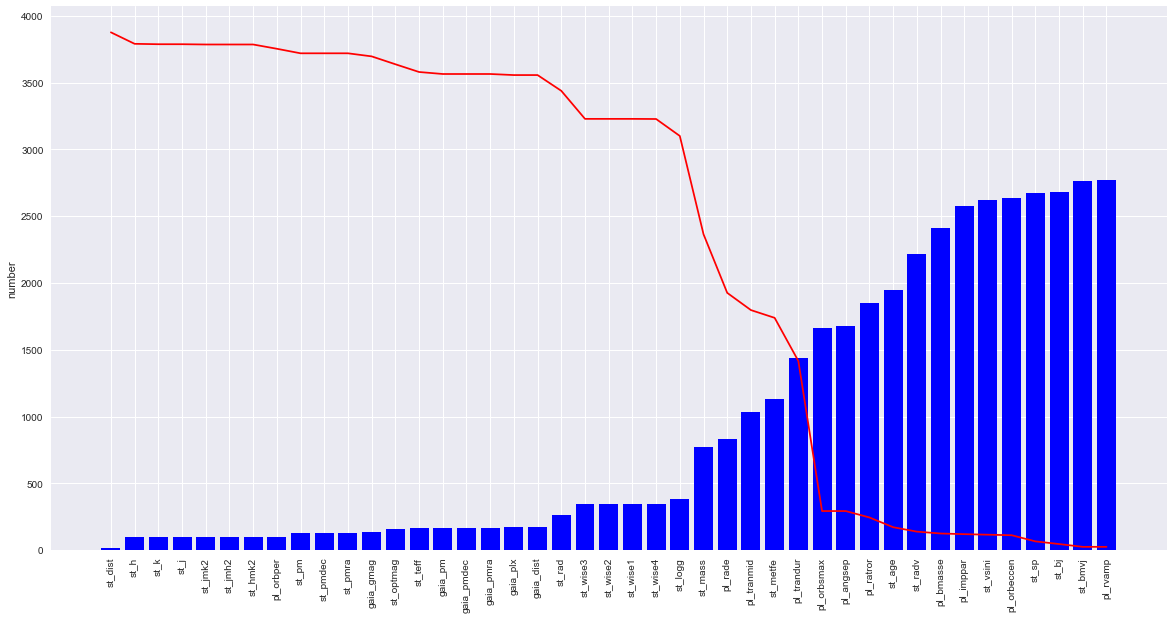

In [22]:
# Then we plot the results
sns.set()
f=plt.figure(figsize=(20,10))
plt.bar(list_null_values.index, list_null_values.nb_empty,color='blue')
plt.plot(aggr_count,color='r')
plt.xticks(list_null_values.index, list_null_values.Variable, rotation=90)
plt.ylabel('number')
plt.legend()
plt.show()

We can see here that adding pl_orbsmax has a very big impact, then we start removing it from the list. We iterate the same for the following features and we check the impact on the number of data points. Target is to have at least 1000. In that way we removed 'pl_orbsmax','pl_angsep','st_radv','pl_bmasse','pl_imppar','st_vsini','pl_orbeccen','st_sp','st_bj','st_bmvj' and 'pl_rvamp'. Notice that we were able to maintain 'pl_ratror' and 'st_age' that were previously removed.

In [23]:
list_null_values = list_null_values[(list_null_values.Variable!='pl_orbsmax')&
                                    (list_null_values.Variable!='pl_angsep')&(list_null_values.Variable!='st_radv')&
                                    (list_null_values.Variable!='pl_bmasse')&(list_null_values.Variable!='pl_imppar')&
                                    (list_null_values.Variable!='st_vsini')&(list_null_values.Variable!='pl_orbeccen')&
                                    (list_null_values.Variable!='st_sp')&(list_null_values.Variable!='st_bj')&
                                    (list_null_values.Variable!='st_bmvj')&(list_null_values.Variable!='pl_rvamp')]
list_null_values.reset_index(inplace=True, drop=True)
#&(list_null_values.Variable!='pl_rvamp')

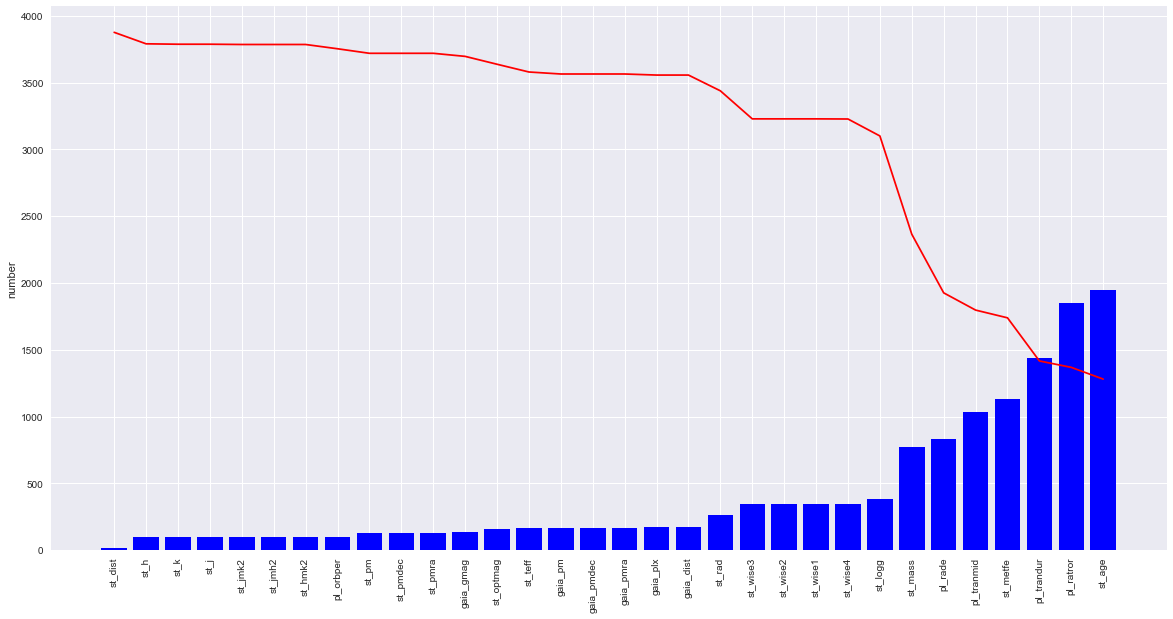

In [24]:
# We calculate here the number of remaining data points each time we add a feature to the list
aggr_count = []
for i in range(list_null_values.shape[0]):
    X_part = X_all.drop(list_null_values.Variable[i+1:],axis=1)
    X_part = X_part.drop(['pl_orbsmax','pl_angsep','st_radv','pl_bmasse','pl_imppar','st_vsini',
                          'pl_orbeccen','st_sp','st_bj','st_bmvj','pl_rvamp'],axis=1)
    X_nn = X_part[X_part.isnull().sum(axis=1)==0]
    aggr_count.append(X_nn.shape[0])

# Then we plot the results
sns.set()
f=plt.figure(figsize=(20,10))
plt.bar(list_null_values.index, list_null_values.nb_empty,color='blue')
plt.plot(aggr_count,color='r')
plt.xticks(list_null_values.index, list_null_values.Variable, rotation=90)
plt.ylabel('number')
plt.legend()
plt.show()

In [25]:
X_part = X_all.drop(['pl_orbsmax','pl_angsep','st_radv','pl_bmasse','pl_imppar','st_vsini','pl_orbeccen','st_sp','st_bj',
                      'st_bmvj','pl_rvamp'],axis=1)
X_nn = X_part[X_part.isnull().sum(axis=1)==0]
print('The final input has {} data points and {} features'.format(X_nn.shape[0],X_nn.shape[1]))

The final input has 1280 data points and 41 features


##### PCA Analysis

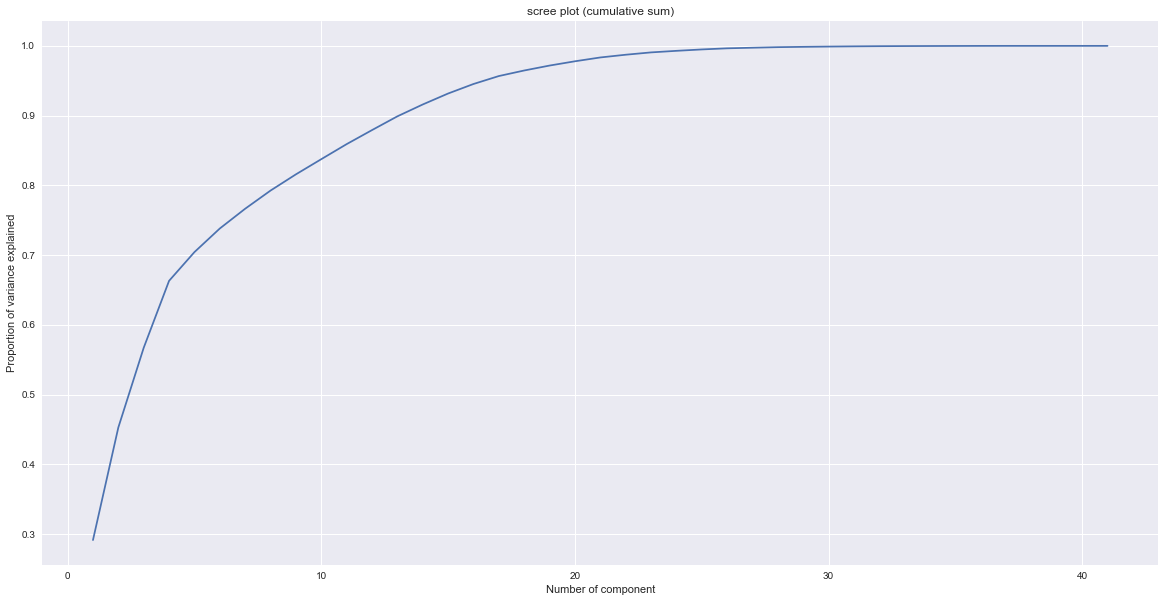

To retain 95% of the variance explained, we should keep 17 components over 41
To retain 99% of the variance explained, we should keep 23 components over 41
To retain 99,99% of the variance explained, we should keep 36 components over 41


In [26]:
# PVE calculation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_nn_rescaled = scaler.fit_transform(X_nn)
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_nn_rescaled)
pve = pca.explained_variance_ratio_

# Scree plot
x_coor = np.arange(1, X_nn.shape[1]+1)
f = plt.figure(figsize=(20, 10))
pve_cumsum = np.cumsum(pve[0:X_nn.shape[1]]) # Calculate cumulative sum
plt.plot(x_coor,pve_cumsum)
plt.xlabel('Number of component')
plt.ylabel('Proportion of variance explained')
plt.title('scree plot (cumulative sum)')
plt.xticks(np.arange(0, X_nn.shape[1]+1, step=10))
plt.show()

# How many components should we keep to retain 95%, 99% and 99,99% of the variance explained?
print('To retain 95% of the variance explained, we should keep {} components over {}'.
      format(((~(pve_cumsum >= 0.95)).sum())+1,X_nn.shape[1]))
print('To retain 99% of the variance explained, we should keep {} components over {}'.
      format(((~(pve_cumsum >= 0.99)).sum())+1,X_nn.shape[1]))
print('To retain 99,99% of the variance explained, we should keep {} components over {}'.
      format(((~(pve_cumsum >= 0.9999)).sum())+1,X_nn.shape[1]))

In [27]:
print('The 3 first components retain {:%} of the variance explained'.format(pve[0]+pve[1]+pve[2]))

The 3 first components retain 56.703177% of the variance explained


In [28]:
pca3 = PCA(n_components=3)
X_3d_rescaled = pca3.fit_transform(X_nn_rescaled)

# Create DataFrame with variance and principal components
pca3_df = pd.DataFrame.from_items([('1st component', pca3.components_[0]),('2nd component', pca3.components_[1]),
                              ('3rd component', pca3.components_[2]),]).set_index(X_nn.columns)

# Sort DataFrame by the coefficients of the 1st loading vector
pca3_df.sort_values('2nd component', ascending=False)

,1st component,2nd component,3rd component
st_jmk2,-0.074916,0.334836,-0.096634
st_jmh2,-0.085944,0.322047,-0.087370
st_logg,-0.110888,0.303014,-0.070340
gaia_plx,0.187023,0.235958,0.119160
st_hmk2,-0.018595,0.224417,-0.077452
st_pm,0.140021,0.204422,0.175206
gaia_pm,0.140674,0.203809,0.173966
gaia_pmdec,0.097746,0.153273,0.226925
st_pmdec,0.097003,0.153083,0.227900
gaia_pmra,0.103066,0.125681,0.185790


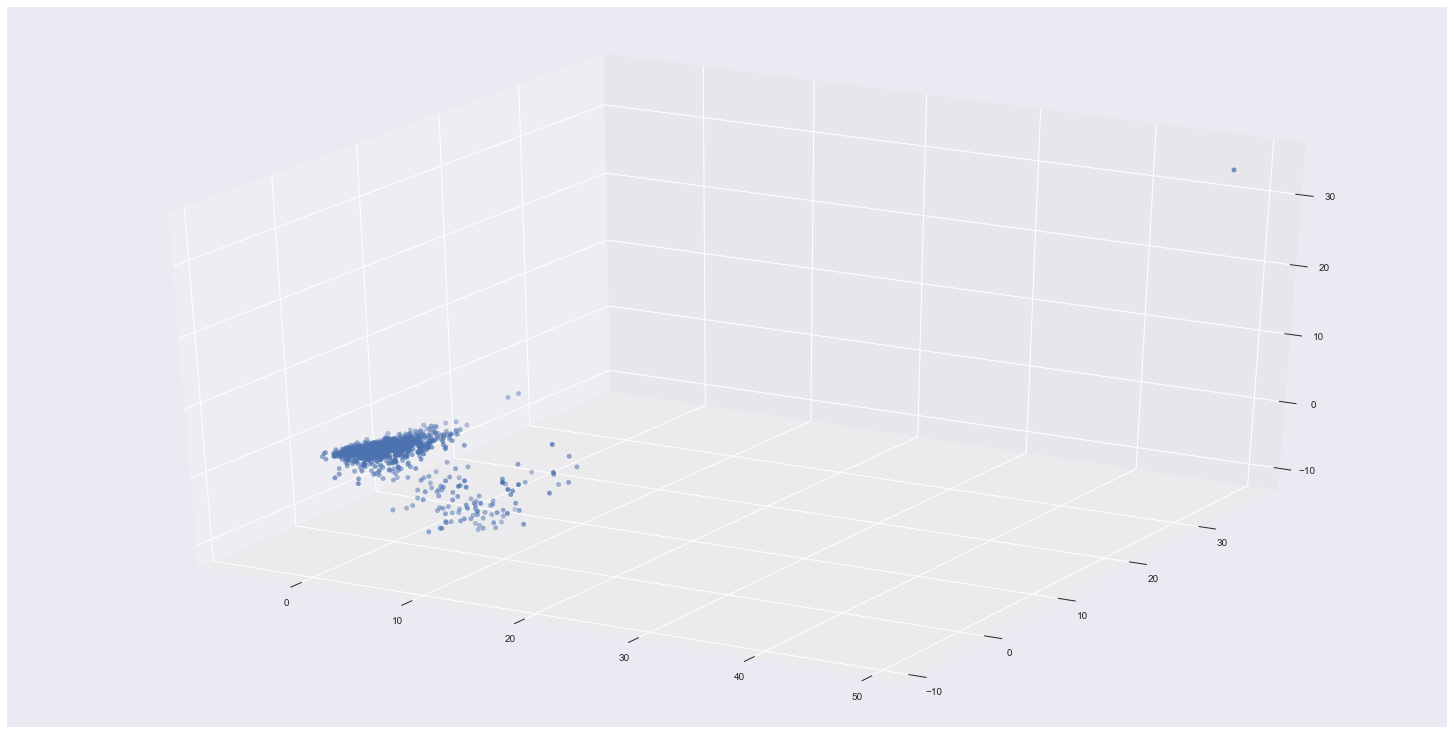

In [29]:
# 3D scatter on the first 3 components

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)

ax.scatter(X_3d_rescaled[:, 0], X_3d_rescaled[:, 1], X_3d_rescaled[:, 2]) # We remove the last point as it's an outlier
plt.show()

There's clearly an outlier in this plot. let's remove it to have a clearer illustration

In [30]:
X_3d_rescaled

array([[ 1.96512923,  2.89476058, -3.81700542],
       [ 4.43408439, -2.25162132, -1.7883558 ],
       [ 2.61740122, -1.0267693 , -6.64001429],
       ...,
       [ 8.04350049,  0.25587957, -7.79114442],
       [11.07554568, -4.06325934, -2.55356967],
       [48.75400413, 37.55760058, 34.10337864]])

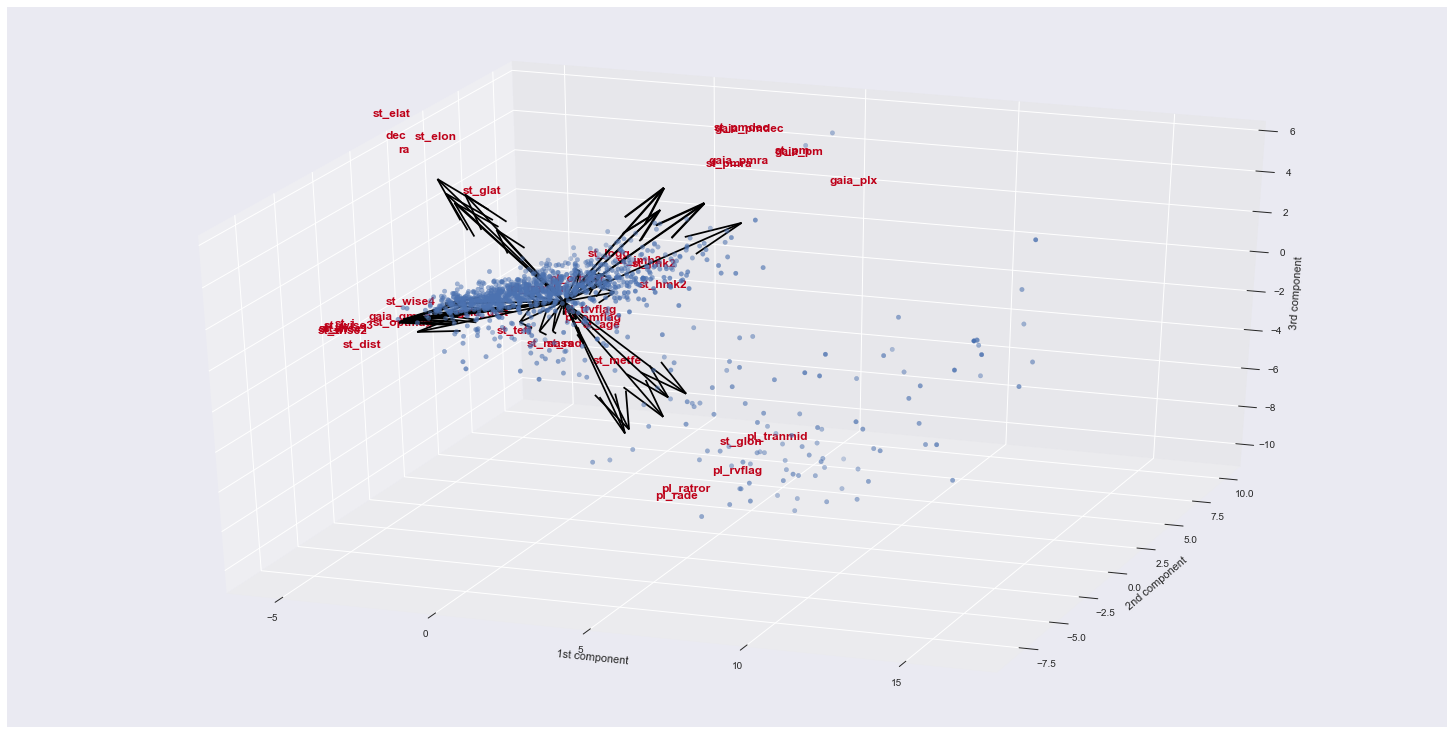

In [31]:
# The outlier is the last point
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(X_3d_rescaled[:-1, 0], X_3d_rescaled[:-1, 1], X_3d_rescaled[:-1, 2]) # We remove the last point as it's an outlier

# Plot a features using the weights in the loading vectors
for feature in X_nn.columns:
    # Get weights
    weight1 = pca3_df.loc[feature, '1st component']*20 # rescale the wheits (20 has been chosen so arrows are visible)
    weight2 = pca3_df.loc[feature, '2nd component']*20
    weight3 = pca3_df.loc[feature, '3rd component']*20

    # plot them
    ax.quiver(
        0, 0, 0,# Vector starts here
        weight1, weight2, weight3, # and ends here
        color='black')
    ax.text(
        weight1*1.5, # x location (1.5 is arbitrary)
        weight2*1.5,# y location
        weight3*1.5,# z location
        feature, # Feature name
        weight='bold', color='xkcd:scarlet')

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')

# Controlling plot rotation
ax.view_init(elev=None,azim=290)
plt.show()    

What is interesting to see here is that there is 5 groups of directions in that plot

### 2 - Clustering

### 2-1 k-means

Let's start with the k-means and consider it as our baseline

                                                Number of planets per cluster


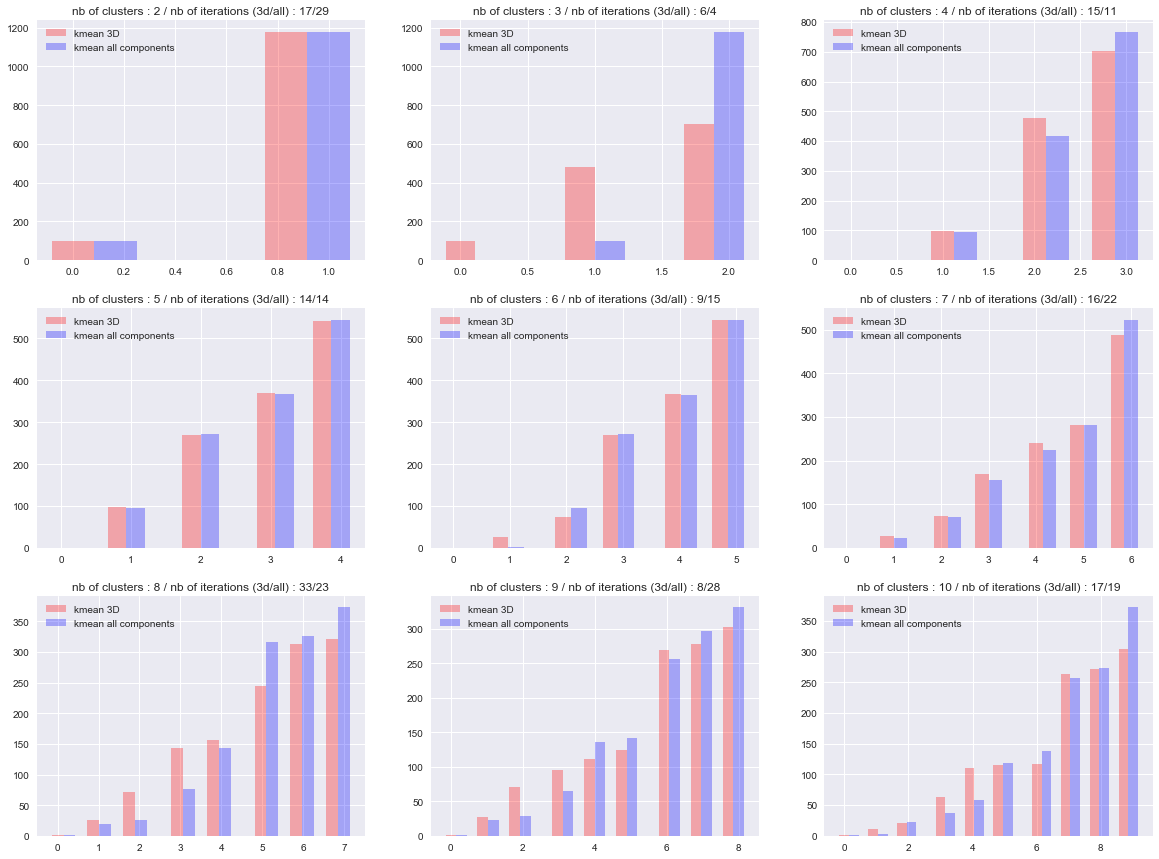

Wall time: 3.71 s


In [32]:
%%time
from sklearn.cluster import KMeans
f = plt.figure(figsize=(20, 15))
for j in range (2,11):
    n_clusters = j
    
    # Create k-means object
    kmeans_3d = KMeans(n_clusters=n_clusters,random_state=0)
    kmeans_all = KMeans(n_clusters=n_clusters,random_state=0)
    
    # Fit it to the data
    kmeans_3d.fit(X_3d_rescaled)
    kmeans_all.fit(X_nn_rescaled)
    
    # Here we create a routine to align classes labels between 3d and all
    # for 3d
    unique_3d, counts_3d = np.unique(kmeans_3d.labels_, return_counts=True)
    class_count_3d = pd.DataFrame({'Class_nb':unique_3d,'count':counts_3d})
    class_count_3d.sort_values('count',inplace=True)
    class_count_3d.reset_index(inplace=True, drop=True)
    for i in range(class_count_3d.shape[0]):
        kmeans_3d.labels_[kmeans_3d.labels_==class_count_3d.Class_nb[i]] = i+class_count_3d.shape[0]
    unique_3d, counts_3d = np.unique(kmeans_3d.labels_, return_counts=True)
    class_count_3d = pd.DataFrame({'Class_nb':unique_3d,'count':counts_3d})
    class_count_3d.sort_values('count',inplace=True)
    class_count_3d.reset_index(inplace=True, drop=True)
    for i in range(class_count_3d.shape[0]):
        kmeans_3d.labels_[kmeans_3d.labels_==class_count_3d.Class_nb[i]] = i
        
    # for all
    unique_all, counts_all = np.unique(kmeans_all.labels_, return_counts=True)
    class_count_all = pd.DataFrame({'Class_nb':unique_all,'count':counts_all})
    class_count_all.sort_values('count',inplace=True)
    class_count_all.reset_index(inplace=True, drop=True)
    for i in range(class_count_all.shape[0]):
        kmeans_all.labels_[kmeans_all.labels_==class_count_all.Class_nb[i]] = i+class_count_all.shape[0]
    unique_all, counts_all = np.unique(kmeans_all.labels_, return_counts=True)
    class_count_all = pd.DataFrame({'Class_nb':unique_all,'count':counts_all})
    class_count_all.sort_values('count',inplace=True)
    class_count_all.reset_index(inplace=True, drop=True)
    for i in range(class_count_all.shape[0]):
        kmeans_all.labels_[kmeans_all.labels_==class_count_all.Class_nb[i]] = i
    
    # Plot histograms
    subplot = f.add_subplot(3,3,j-1)
    plt.hist(kmeans_3d.labels_, alpha=0.3, bins=n_clusters*3,color='r', label='kmean 3D', align='left')
    plt.hist(kmeans_all.labels_, alpha=0.3, bins=n_clusters*3,color='b', label='kmean all components', align='right')
    plt.legend()
    plt.title('nb of clusters : {} / nb of iterations (3d/all) : {}/{}'.format(n_clusters,kmeans_3d.n_iter_,kmeans_all.n_iter_))

print('                                                Number of planets per cluster')
plt.show()

In order to be the most representative of the overall component, we should use either 2 or 5 clusters.

##### 2 Clusters

Classes distribution for 2 clusters {0: 1179, 1: 101}


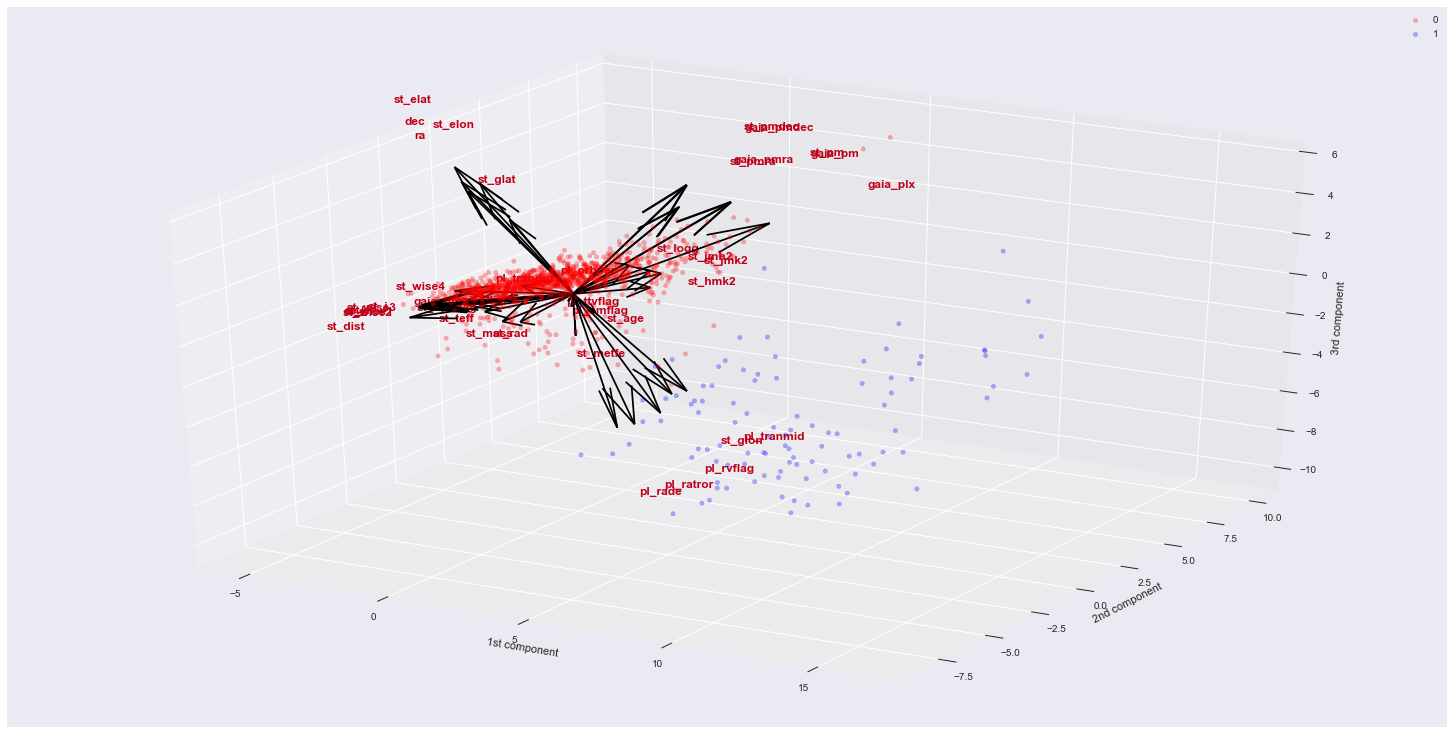

Wall time: 547 ms


In [33]:
%%time
# Create k-means object with 2 clusters and fit it
n_clusters = 2
kmeans_3d = KMeans(n_clusters=n_clusters,random_state=0)
kmeans_3d.fit(X_3d_rescaled)
unique_3d, counts_3d = np.unique(kmeans_3d.labels_, return_counts=True)
print('Classes distribution for 2 clusters',dict(zip(unique_3d, counts_3d)))

# Plotting
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)

colors = ['red','blue','black','orange','green']

X_3d_wo_outlier = X_3d_rescaled[:-1,:] # The outlier is the last point
for i in range(n_clusters):
    idx = (kmeans_3d.labels_[:-1]== i)
    x = X_3d_wo_outlier[idx, 0]
    y = X_3d_wo_outlier[idx, 1]
    z = X_3d_wo_outlier[idx, 2]
    ax.scatter(x, y, z, alpha=0.3,color=colors[i],label=i)

# Plot a features using the weights in the loading vectors
for feature in X_nn.columns:
    # Get weights
    weight1 = pca3_df.loc[feature, '1st component']*20 # rescale the wheits (20 has been chosen so arrows are visible)
    weight2 = pca3_df.loc[feature, '2nd component']*20
    weight3 = pca3_df.loc[feature, '3rd component']*20

    # plot them
    ax.quiver(
        0, 0, 0,# Vector starts here
        weight1, weight2, weight3, # and ends here
        color='black')
    ax.text(
        weight1*1.5, # x location (1.5 is arbitrary)
        weight2*1.5,# y location
        weight3*1.5,# z location
        feature, # Feature name
        weight='bold', color='xkcd:scarlet')

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')

# Controlling plot rotation
ax.view_init(elev=None,azim=None)
ax.legend()
plt.show()    

- class 0 is mainly caracterized by the host star phyisical caracteristics (st_teff, st_mass, st_rad) and its position
- class 1 is mainly caracterized by planet parameters (pl_ratror, pl_rade, pl_rade and pl_tranmid) and the host star color

#### 5 Clusters

Classes distribution for 5 clusters {0: 370, 1: 270, 2: 1, 3: 97, 4: 542}


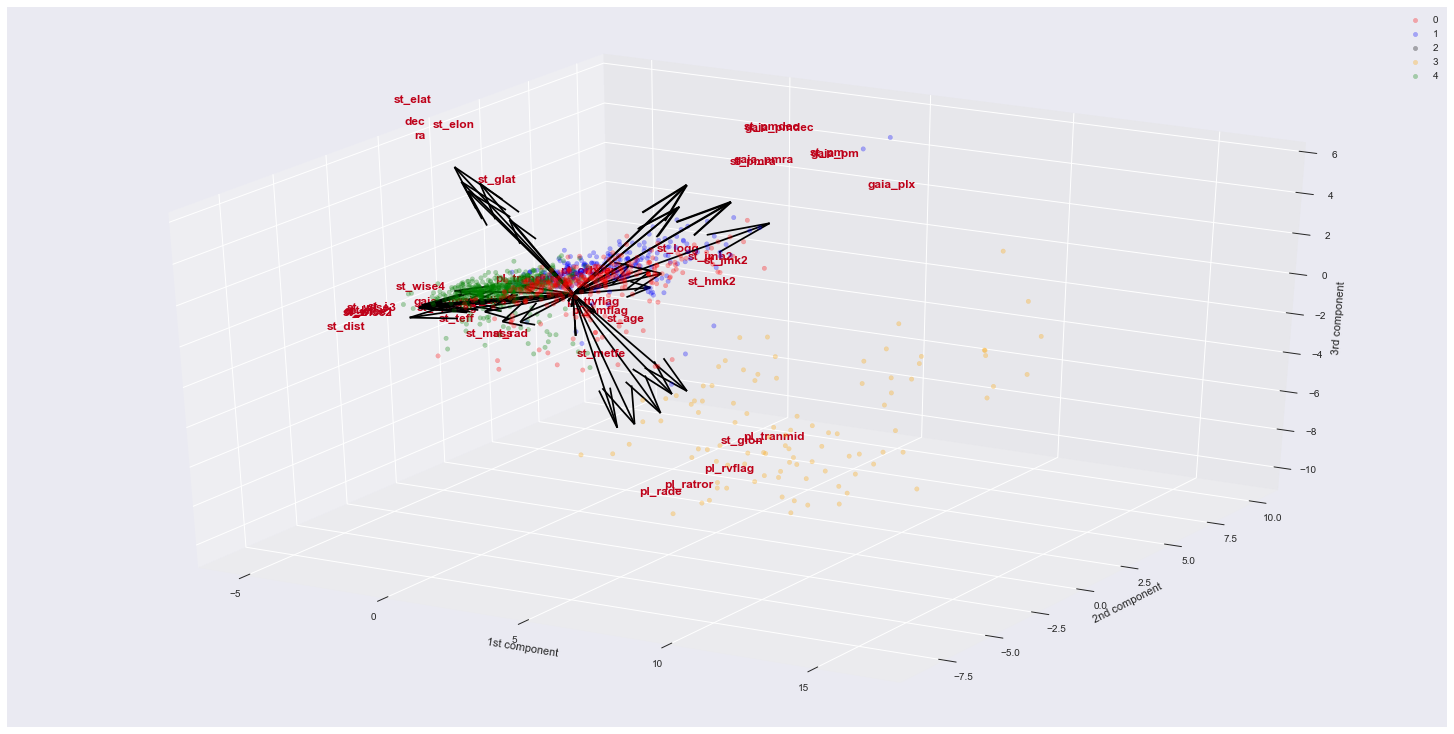

Wall time: 568 ms


In [34]:
%%time
# Create k-means object with 5 clusters and fit it
n_clusters = 5
kmeans_3d = KMeans(n_clusters=n_clusters,random_state=0)
kmeans_3d.fit(X_3d_rescaled)
unique_3d, counts_3d = np.unique(kmeans_3d.labels_, return_counts=True)
print('Classes distribution for 5 clusters',dict(zip(unique_3d, counts_3d)))

# Plotting
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)

colors = ['red','blue','black','orange','green']

X_3d_wo_outlier = X_3d_rescaled[:-1,:] # The outlier is the last point
for i in range(n_clusters):
    idx = (kmeans_3d.labels_[:-1]== i)
    x = X_3d_wo_outlier[idx, 0]
    y = X_3d_wo_outlier[idx, 1]
    z = X_3d_wo_outlier[idx, 2]
    ax.scatter(x, y, z, alpha=0.3,color=colors[i],label=i)

# Plot a features using the weights in the loading vectors
for feature in X_nn.columns:
    # Get weights
    weight1 = pca3_df.loc[feature, '1st component']*20 # rescale the wheits (20 has been chosen so arrows are visible)
    weight2 = pca3_df.loc[feature, '2nd component']*20
    weight3 = pca3_df.loc[feature, '3rd component']*20

    # plot them
    ax.quiver(
        0, 0, 0,# Vector starts here
        weight1, weight2, weight3, # and ends here
        color='black')
    ax.text(
        weight1*1.5, # x location (1.5 is arbitrary)
        weight2*1.5,# y location
        weight3*1.5,# z location
        feature, # Feature name
        weight='bold', color='xkcd:scarlet')

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')

# Controlling plot rotation
ax.view_init(elev=None,azim=None)
ax.legend()
plt.show()    

- class 0 is mainly caracterized by the host star phyisical caracteristics (st_teff, st_mass, st_rad)
- class 1 is mainly caracterized by the host star color (st_jmh2, st_hmk2 and st_jmk2) and the Stellar Surface Gravity (st_logg)
- class 3 is mainly caracterized by planet parameters (pl_ratror, pl_rade, pl_rade and pl_tranmid)
- class 4 is mainly caraterized by the host star and the planetery system position

### 2-2 Spectral Clustering

Since we considered k-means as our baseline, we will continue doing the same here, setting running the other algorithms with 2 or 5 clusters.

##### 2 Clusters

In [35]:
%%time
# Fitting
from sklearn.cluster import SpectralClustering

n_clusters = 2
sc_3d = SpectralClustering(n_clusters=n_clusters,random_state=0)
sc_3d.fit(X_3d_rescaled)
unique_3d, counts_3d = np.unique(sc_3d.labels_, return_counts=True)

Wall time: 3min 8s


Classes distribution for 2 clusters {0: 663, 1: 617}


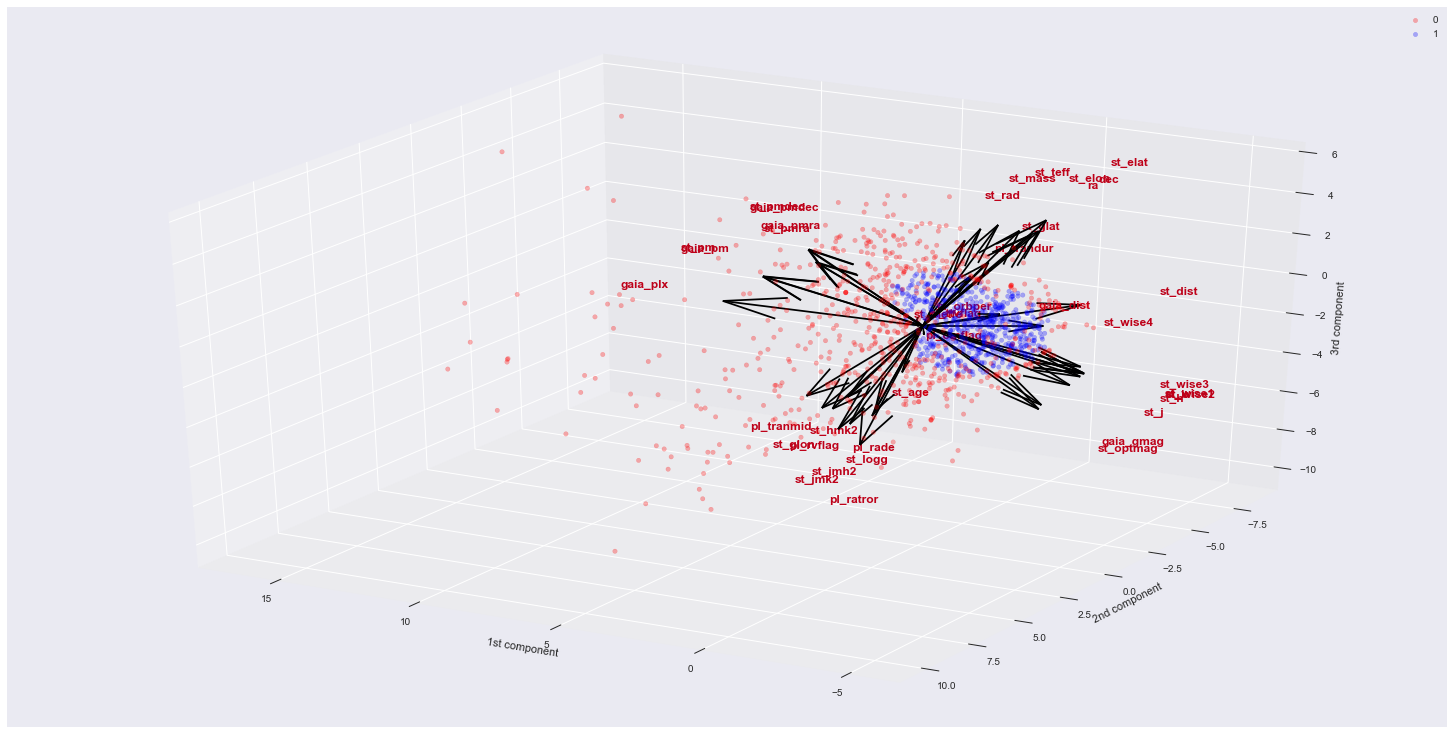

In [36]:
# Plotting
print('Classes distribution for 2 clusters',dict(zip(unique_3d, counts_3d)))
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)

colors = ['red','blue','black','orange','green']

X_3d_wo_outlier = X_3d_rescaled[:-1,:] # The outlier is the last point
for i in range(n_clusters):
    idx = (sc_3d.labels_[:-1]== i)
    x = X_3d_wo_outlier[idx, 0]
    y = X_3d_wo_outlier[idx, 1]
    z = X_3d_wo_outlier[idx, 2]
    ax.scatter(x, y, z, alpha=0.3,color=colors[i],label=i)

# Plot a features using the weights in the loading vectors
for feature in X_nn.columns:
    # Get weights
    weight1 = pca3_df.loc[feature, '1st component']*20 # rescale the wheits (20 has been chosen so arrows are visible)
    weight2 = pca3_df.loc[feature, '2nd component']*20
    weight3 = pca3_df.loc[feature, '3rd component']*20

    # plot them
    ax.quiver(
        0, 0, 0,# Vector starts here
        weight1, weight2, weight3, # and ends here
        color='black')
    ax.text(
        weight1*1.5, # x location (1.5 is arbitrary)
        weight2*1.5,# y location
        weight3*1.5,# z location
        feature, # Feature name
        weight='bold', color='xkcd:scarlet')

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')

# Controlling plot rotation
ax.view_init(elev=None,azim=120)
ax.legend()
plt.show()    

classes looks to be be defined by inner and outer

##### 5 Clusters

In [37]:
%%time
# Fitting
from sklearn.cluster import SpectralClustering

n_clusters = 5
sc_3d = SpectralClustering(n_clusters=n_clusters,random_state=0)
sc_3d.fit(X_3d_rescaled)
unique_3d, counts_3d = np.unique(sc_3d.labels_, return_counts=True)

Wall time: 491 ms


Classes distribution for 5 clusters {0: 269, 1: 261, 2: 3, 3: 318, 4: 429}


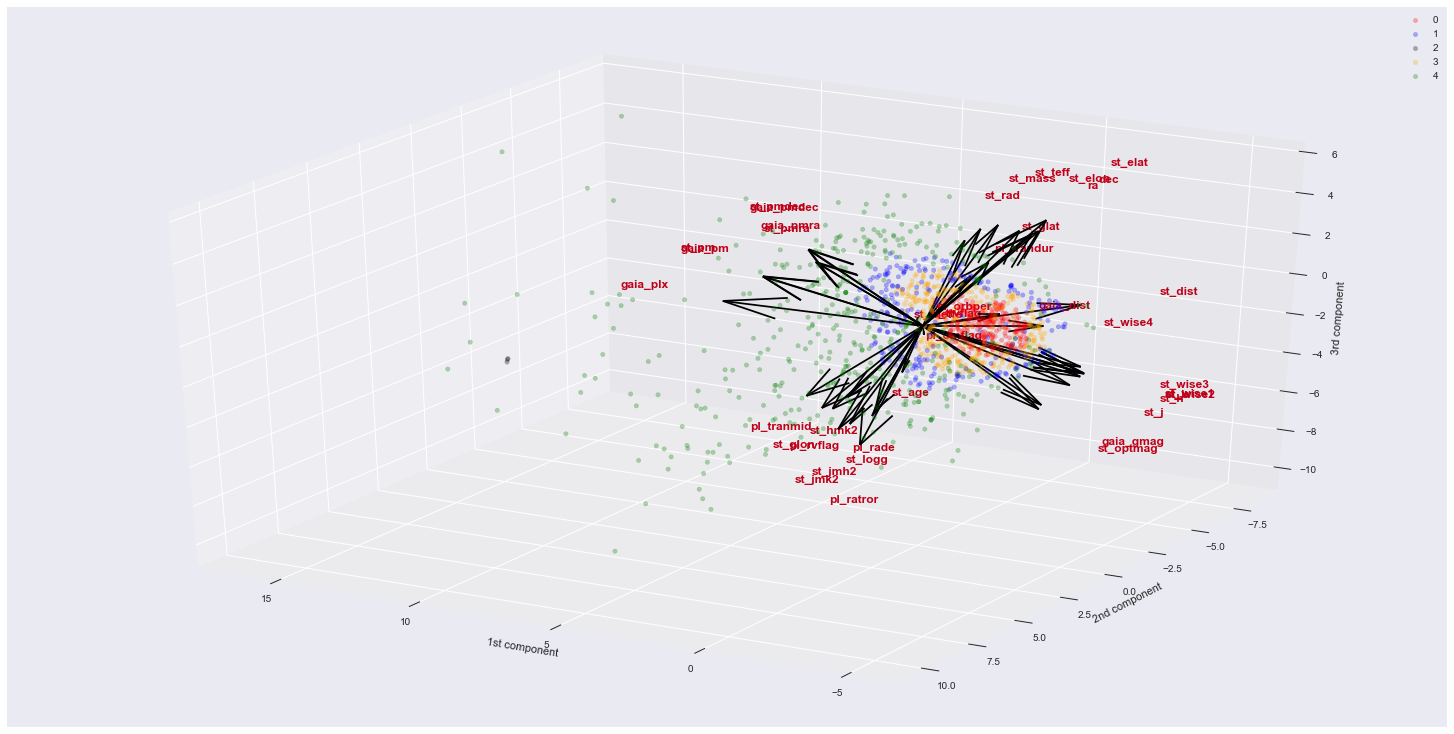

In [38]:
# Plotting
print('Classes distribution for 5 clusters',dict(zip(unique_3d, counts_3d)))
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)

colors = ['red','blue','black','orange','green']

X_3d_wo_outlier = X_3d_rescaled[:-1,:] # The outlier is the last point
for i in range(n_clusters):
    idx = (sc_3d.labels_[:-1]== i)
    x = X_3d_wo_outlier[idx, 0]
    y = X_3d_wo_outlier[idx, 1]
    z = X_3d_wo_outlier[idx, 2]
    ax.scatter(x, y, z, alpha=0.3,color=colors[i],label=i)

# Plot a features using the weights in the loading vectors
for feature in X_nn.columns:
    # Get weights
    weight1 = pca3_df.loc[feature, '1st component']*20 # rescale the wheits (20 has been chosen so arrows are visible)
    weight2 = pca3_df.loc[feature, '2nd component']*20
    weight3 = pca3_df.loc[feature, '3rd component']*20

    # plot them
    ax.quiver(
        0, 0, 0,# Vector starts here
        weight1, weight2, weight3, # and ends here
        color='black')
    ax.text(
        weight1*1.5, # x location (1.5 is arbitrary)
        weight2*1.5,# y location
        weight3*1.5,# z location
        feature, # Feature name
        weight='bold', color='xkcd:scarlet')

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')

# Controlling plot rotation
ax.view_init(elev=None,azim=120)
ax.legend()
plt.show()    

Same than with 2 clusters

### 2-3 Agglomerative clustering (ward with connectivity constraint)

Since we considered k-means as our baseline, we will continue doing the same here, setting running the other algorithms with 2 or 5 clusters.

##### 2 Clusters

In [39]:
%%time
# Fitting
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X_3d_rescaled, n_neighbors=10, include_self=False)
n_clusters = 2
wd_3d = AgglomerativeClustering(n_clusters=n_clusters, connectivity=connectivity,
                               linkage='ward')
wd_3d.fit(X_3d_rescaled)
unique_3d, counts_3d = np.unique(wd_3d.labels_, return_counts=True)

Wall time: 74.8 ms


Classes distribution for 2 clusters {0: 106, 1: 1174}


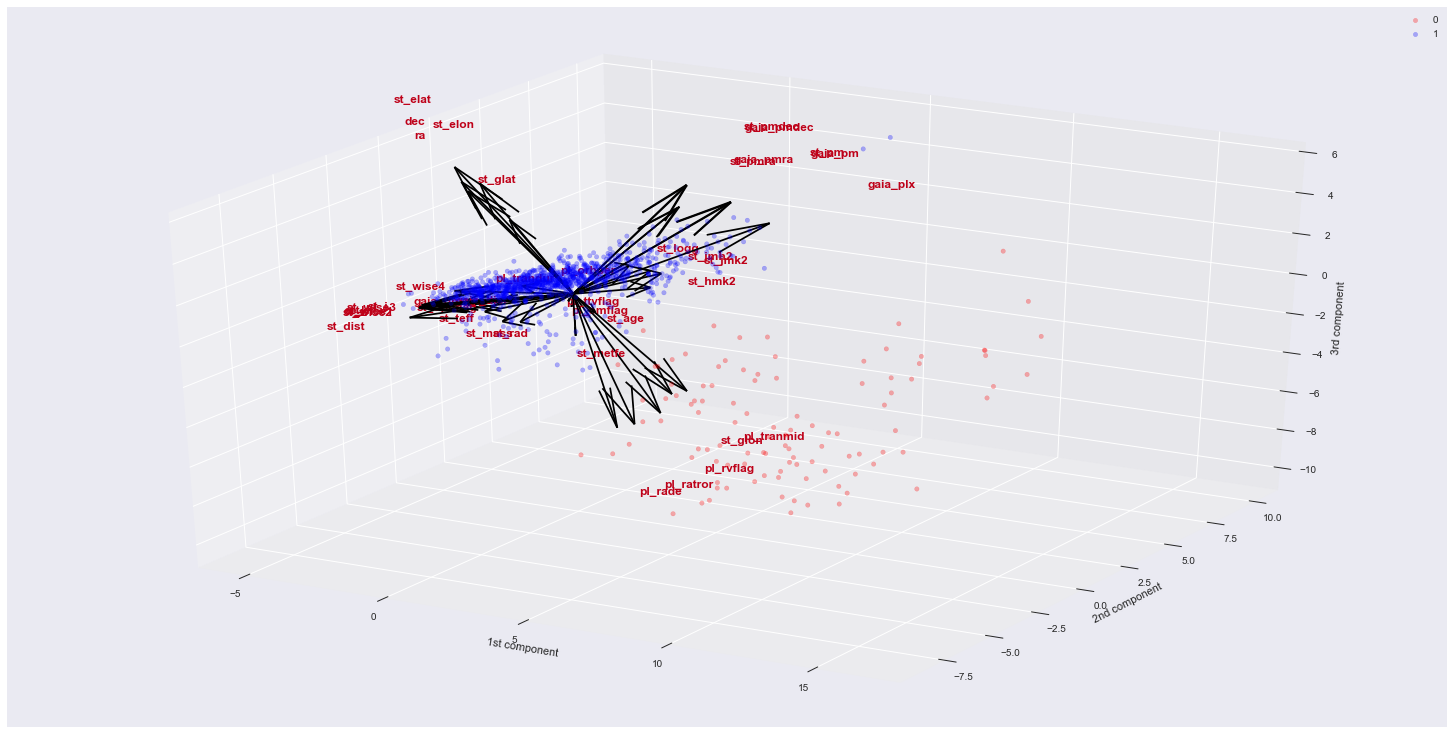

In [40]:
# Plotting
print('Classes distribution for 2 clusters',dict(zip(unique_3d, counts_3d)))
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)

colors = ['red','blue','black','orange','green']

X_3d_wo_outlier = X_3d_rescaled[:-1,:] # The outlier is the last point
for i in range(n_clusters):
    idx = (wd_3d.labels_[:-1]== i)
    x = X_3d_wo_outlier[idx, 0]
    y = X_3d_wo_outlier[idx, 1]
    z = X_3d_wo_outlier[idx, 2]
    ax.scatter(x, y, z, alpha=0.3,color=colors[i],label=i)

# Plot a features using the weights in the loading vectors
for feature in X_nn.columns:
    # Get weights
    weight1 = pca3_df.loc[feature, '1st component']*20 # rescale the wheits (20 has been chosen so arrows are visible)
    weight2 = pca3_df.loc[feature, '2nd component']*20
    weight3 = pca3_df.loc[feature, '3rd component']*20

    # plot them
    ax.quiver(
        0, 0, 0,# Vector starts here
        weight1, weight2, weight3, # and ends here
        color='black')
    ax.text(
        weight1*1.5, # x location (1.5 is arbitrary)
        weight2*1.5,# y location
        weight3*1.5,# z location
        feature, # Feature name
        weight='bold', color='xkcd:scarlet')

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')

# Controlling plot rotation
ax.view_init(elev=None,azim=None)
ax.legend()
plt.show()    

Clusters are quite similar then the ones from K-means

##### 5 Clusters

In [41]:
%%time
# Fitting
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X_3d_rescaled, n_neighbors=10, include_self=False)
n_clusters = 5
wd_3d = AgglomerativeClustering(n_clusters=n_clusters, connectivity=connectivity,
                               linkage='ward')
wd_3d.fit(X_3d_rescaled)
unique_3d, counts_3d = np.unique(wd_3d.labels_, return_counts=True)

Wall time: 74.8 ms


Classes distribution for 5 clusters {0: 682, 1: 105, 2: 1, 3: 350, 4: 142}


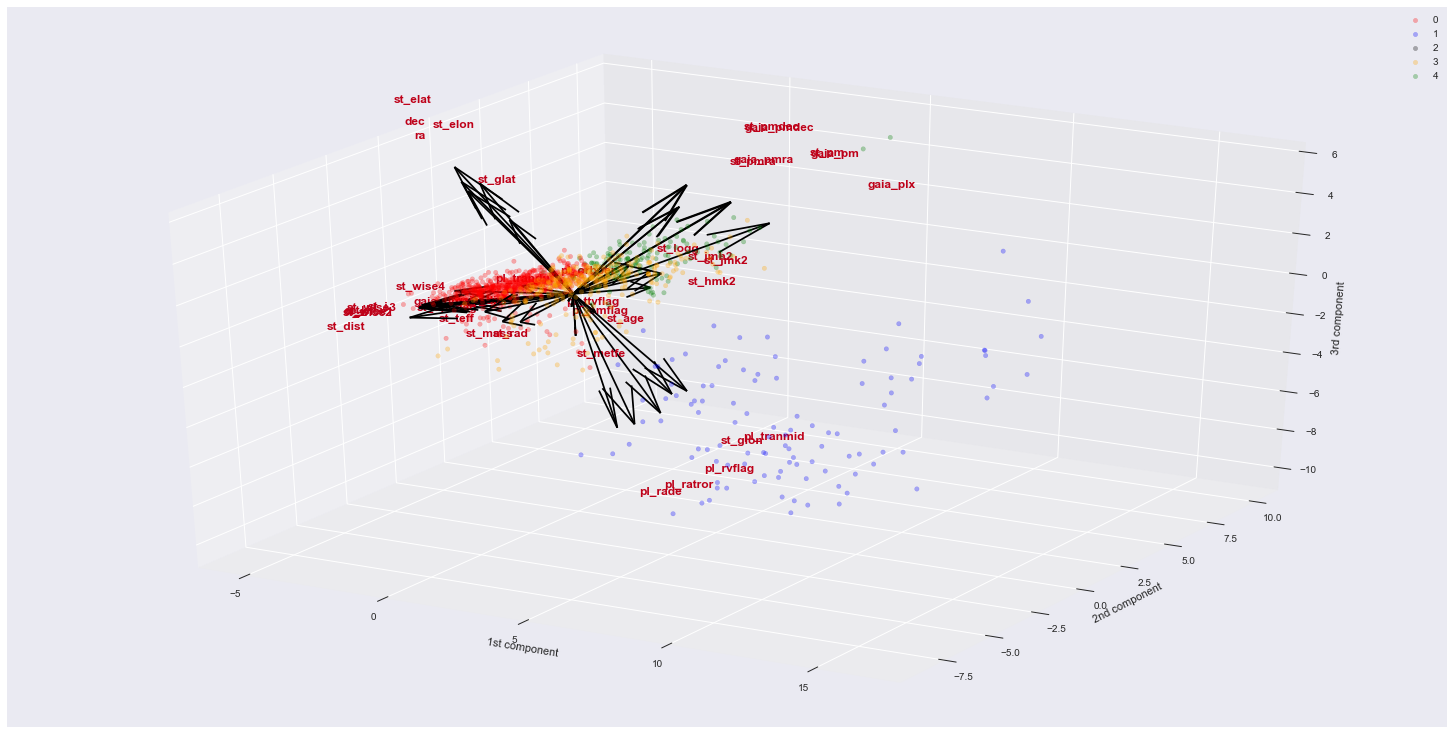

In [42]:
# Plotting
print('Classes distribution for 5 clusters',dict(zip(unique_3d, counts_3d)))
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)

colors = ['red','blue','black','orange','green']

X_3d_wo_outlier = X_3d_rescaled[:-1,:] # The outlier is the last point
for i in range(n_clusters):
    idx = (wd_3d.labels_[:-1]== i)
    x = X_3d_wo_outlier[idx, 0]
    y = X_3d_wo_outlier[idx, 1]
    z = X_3d_wo_outlier[idx, 2]
    ax.scatter(x, y, z, alpha=0.3,color=colors[i],label=i)

# Plot a features using the weights in the loading vectors
for feature in X_nn.columns:
    # Get weights
    weight1 = pca3_df.loc[feature, '1st component']*20 # rescale the wheits (20 has been chosen so arrows are visible)
    weight2 = pca3_df.loc[feature, '2nd component']*20
    weight3 = pca3_df.loc[feature, '3rd component']*20

    # plot them
    ax.quiver(
        0, 0, 0,# Vector starts here
        weight1, weight2, weight3, # and ends here
        color='black')
    ax.text(
        weight1*1.5, # x location (1.5 is arbitrary)
        weight2*1.5,# y location
        weight3*1.5,# z location
        feature, # Feature name
        weight='bold', color='xkcd:scarlet')

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')

# Controlling plot rotation
ax.view_init(elev=None,azim=None)
ax.legend()
plt.show()    

Same than for 2 clusters, very similar to K-means. This is due to the use of the same metrics (Distances between points)